<a href="https://colab.research.google.com/github/Anuj-gitch/DataScience/blob/main/Data_Analysis/Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. We'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods we learn apply to all areas of science, engineering, and business. We'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

## Read, clean, and validate

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what we'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.



### Read the codebook

When we work with datasets like the NSFG, it is important to read the documentation carefully. Interpret a variable incorrectly, may lead to generate nonsense results and never realize it. So, before start coding, we want to make sure we are familiar with the NSFG codebook, which describes every variable.

CookBook : https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999

* Type "birthweight" in the search field, UNSELECT the checkbox that says "Search variable name only", and press "Search". You should see a list of variables related to birthweight.

* Click on "BIRTHWGT_OZ1" and read the documentation of this variable. For your convenience, it is also displayed here:

### Exploring the NSFG data
To get the number of rows and columns in a DataFrame, we can read its shape attribute.

To get the column names, we can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.

__Calculate the number of rows and columns in the DataFrame nsfg.__

In [1]:
import pandas as pd
import numpy as np

In [2]:
nsfg = pd.read_hdf("/content/drive/My Drive/DataCamp_DataScience/Eploratory Data Analysis/nsfg.hdf5")

In [3]:
nsfg.shape

(9358, 10)

__Display the names of the columns in nsfg.__

In [4]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

__Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.__

In [5]:
ounces = nsfg.birthwgt_oz1

__Display the first 5 elements of ounces.__

In [6]:
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

These attributes and methods; useful when we are exploring a new dataset. It's now time to check for errors and prepare the data for analysis. Keep going!

### Validate a variable

    In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

    value	label
    1	Live birth
    2	Induced abortion
    3	Stillbirth
    4	Miscarriage
    5	Ectopic pregnancy
    6	Current pregnancy
     
    Explore it in the Python Shell and use the methods Allen to answer the following question: 
    How many pregnancies in this dataset ended with a live birth?

In [7]:
sum(nsfg.outcome == 1)

6489

### Clean a variable
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If we use .value_counts() to view the responses, we'll see that the value 8 appears once, and if we consult the codebook, we'll see that this value indicates that the respondent refused to answer the question.

Our job in here is to replace this value with np.nan. 

In [8]:
nsfg.nbrnaliv.value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

* __In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.__

* __Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.__

In [9]:
nsfg.nbrnaliv.replace([8],np.nan, inplace = True)

In [10]:
nsfg.nbrnaliv.value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

Excellent. If you are careful about this kind of cleaning and validation, it will save time (in the long run) and avoid potentially serious errors.

### Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

__Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg__

In [13]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [14]:
agecon

0       20.00
1       22.91
2       32.41
3       36.50
4       21.91
        ...  
9353    17.58
9354    17.41
9355    20.91
9356    34.50
9357    36.83
Name: agecon, Length: 9358, dtype: float64

In [15]:
agepreg

0       20.75
1       23.58
2       33.08
3         NaN
4       22.66
        ...  
9353    18.25
9354    18.16
9355    21.58
9356    35.25
9357    37.58
Name: agepreg, Length: 9358, dtype: float64

__Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.__

In [16]:
preg_length = agepreg - agecon

In [17]:
preg_length

0       0.75
1       0.67
2       0.67
3        NaN
4       0.75
        ... 
9353    0.67
9354    0.75
9355    0.67
9356    0.75
9357    0.75
Length: 9358, dtype: float64

In [18]:
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

 A variable that's computed from other variables is sometimes called a 'recode'. 

### Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Matplotlib course.

__Plot a histogram of agecon with 20 bins.__

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

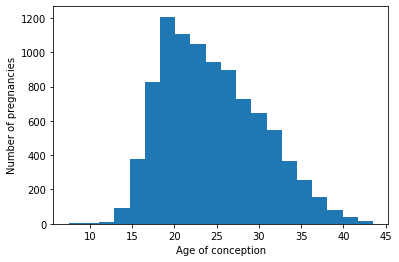

In [20]:
plt.hist(agecon, bins = 20)
plt.xlabel('Age of conception')
plt.ylabel('Number of pregnancies')
plt.show()

__Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.__

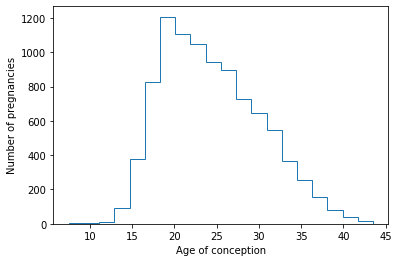

In [21]:
plt.hist(agecon, bins = 20, histtype= 'step')

plt.xlabel('Age of conception')
plt.ylabel('Number of pregnancies')

plt.show()

###Compute birth weight
    Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

    I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. 
    The result is a sample that is representative of the U.S. population.

    Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

    # Resample the data
    nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

    # Clean the weight variables
    pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
    ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

    # Compute total birth weight
    birth_weight = pounds + ounces/16

In [22]:
nsfg

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532


* Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.

* Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.

* Compute the mean weight of full-term babies.

In [24]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
  """Resamples a DataFrame using probabilities proportional to given column.
  df: DataFrame
  column: string column name to use as weights 
  returns: DataFrame"""
  np.random.seed(seed)
  weights = df[column] / sum(df[column])
  indices = np.random.choice(df.index, len(df), replace=True, p=weights)
  sample = df.loc[indices]
  return sample

In [25]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [26]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


### Datetimeindex

In [27]:
stock = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/14_ts_datetimeindex/aapl.csv', parse_dates= ['Date'],
                    index_col = 'Date')
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


__Benifits of DateTimeIndex__

* It provide us the very flexible way to retrive the data from a dataset.
* We can only use brackets to retrive data based on month year or day


__In Below case we have tried to retrive the data where year is 2017 and month is 1__

In [29]:
stock['2017-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


__Finding average price of stock in the month of jan and year 2017__

In [28]:
stock['2017-01'].Close.mean()

119.57000000000001

### Resampling

__What was the monthly sock price__

We can use the resampling technique.

In [30]:
stock.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

**Here it is showing the price with the last date of every month**

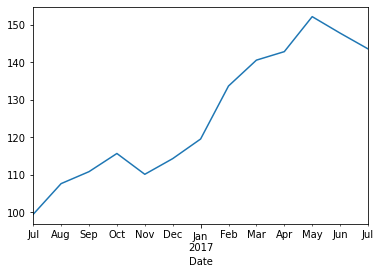

In [31]:
stock.Close.resample('M').mean().plot()

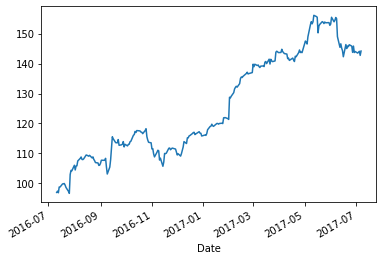

In [32]:
stock.Close.plot()

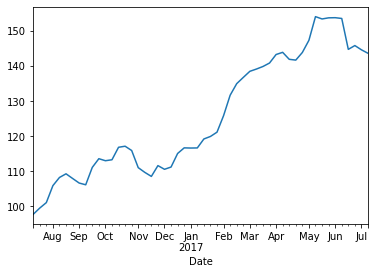

In [33]:
stock.Close.resample('W').mean().plot()

### Filter
we computed the mean birth weight for full-term babies; 

we filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

* Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.

In [34]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


In [35]:
single = nsfg.nbrnaliv == 1

* Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

In [36]:
single_full_term_weight = birth_weight[single & full_term]

In [37]:
print('Single baby with full term weight ' , single_full_term_weight.mean())

Single baby with full term weight  7.40297320308299


* For comparison, select multiple, full-term babies and compute their mean birth weight.

In [38]:
multiple_full_term_baby = birth_weight[~single & full_term]
print('Multple Babay with full term weight ', multiple_full_term_baby.mean())

Multple Babay with full term weight  5.784722222222222


## Distributions

Having cleaned and validated the data, we began exploring it by using histograms to visualize distributions. Know we'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). We'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

### Probability Mass Function

**GSS**

* Annual sample of U.S. population.
* Ask about demographics, social and political beliefs
* Widely used by policy makers and researchers.

1. Probability Mass Function

In the previous chapter, we used histograms to visualize distributions. In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

2. GSS

The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues. It is widely used by politicians, policy makers, and researchers, including me.

3. Read the data

The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this. If you run gss dot head(), you can see the first few rows.

In [39]:
gss = pd.read_hdf('/content/drive/My Drive/DataCamp_DataScience/Eploratory Data Analysis/gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


4. Histogram

To get started with this dataset, let's look at the distribution of educ, which records the number of years of education for each respondent. First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable. Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.




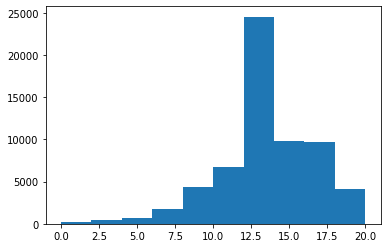

In [40]:
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.show()

But here histogram is not the right kind of plot to determine any thing.

We will use PMF (probability mass function) for interpretation

5. PMF

An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears. I've provided a class called Pmf that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF. I'll explain what that means soon. The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.


In [41]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=71bd4f0e385b734f8c43a68c3ea569b0e2df9f5fd2d9ff22ae98d619d3984931
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [42]:
from empiricaldist import Pmf

#### Defining Pmf Function

Check this for more description:

https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb




In [43]:
Pmf.from_seq(educ, normalize = False).head()

0.0    144
1.0     38
2.0    151
3.0    246
4.0    290
Name: educ, dtype: int64


6. PMF

You can use the bracket operator to look up a value in a Pmf and get a count. This example shows that there are 19145 respondents with 12 years of education, which is the most frequent value.

In [49]:
Pmf.from_seq(educ, normalize = False)[12]

19145

7. Normalize

Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting normalize=True; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1. Now if we use the bracket operator, the result is a fraction. In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

In [45]:
Pmf.from_seq(educ, normalize = True)

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424
3.0,0.003948
4.0,0.004655
5.0,0.006083
6.0,0.013514
7.0,0.013803
8.0,0.038858
9.0,0.031507


8. Plot

The Pmf class provides a bar() method that plots a PMF as a bar chart. And here's what it looks like. In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

9. Histogram vs. PMF

For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

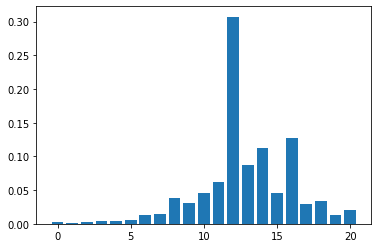

In [46]:
Pmf.from_seq(educ, normalize = True).bar()

###Make a PMF

    The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

    In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

    The Pmf class you saw in the video has already been created for you.

* Make a PMF for year with normalize=False and display the result.

In [47]:
# Compute the Pmf for the year

pmf_year = Pmf.from_seq(gss.year,normalize=False)

In [48]:
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


* How many respondents were interviewed in 2016?

In [50]:
pmf_year[2016]

2867

### Plot a PMF
Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

* Select the 'age' column from the gss DataFrame and store the result in age.

In [ ]:
# Select age column
age = gss.age
age.head()

0    26.0
1    38.0
2    57.0
3    61.0
4    59.0
Name: age, dtype: float64

* Make a normalized PMF of age. Store the result in pmf_age.

In [ ]:
pmf_age = Pmf.from_seq(age, normalize=True)
pmf_age.head()

18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
Name: age, dtype: float64

* Plot pmf_age as a bar chart.

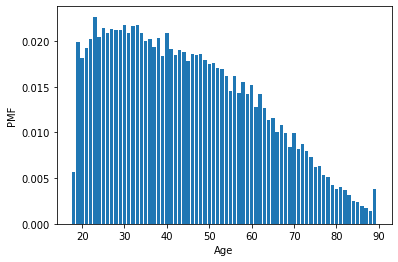

In [ ]:
pmf_age.bar(label = 'educ')
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

### Cumulative distribution functions

In the previous lesson, we saw the probability mass function, or PMF, which represents the possible values in a distribution and their probabilities. In this lesson, we'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.


__From PMF to CDF__


You might remember that a PMF tells you - if you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

If you draw a random element from a sample:

* PMF is the probability that you will get exectly x
* CDF is the probability that you will get exectly <= x


**Example**

As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. The PMF says that the probability of value 1 is 1/5; the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. The CDF is the cumulative sum of the probabilities from the PMF. For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.


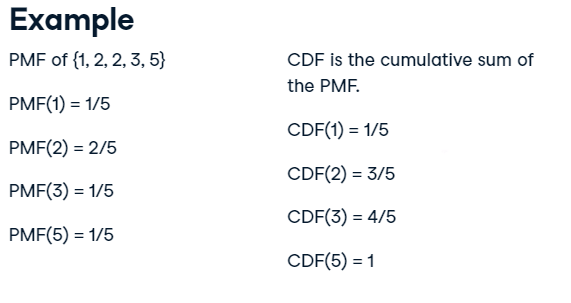


**Make and plot a CDF**

In the code for this course, I provide a Cdf class which is similar to the Pmf class we've seen. As a function, Cdf takes any kind of sequence and returns a new Cdf object. In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. Here's what it looks like. The x-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities, from 0 to 1.

In [ ]:
from empiricaldist import Cdf

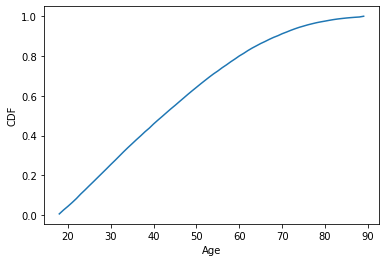

In [ ]:
cdf = Cdf.from_seq(gss.age)
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

__Evaluating the CDF__


The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger. The arrow in the figure shows how you could read this value from the CDF, at least approximately.

In [ ]:
cdf(51)

array(0.66020135)

That 0.6602 is basically showing the percentile for 51. Mean not more then 66.02 percent people are aboved 51 year old.

__Evaluating the inverse CDF__

The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. Again, the arrows in the figure show how you could read these values from the CDF. By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

In [ ]:
# Inverse CDF
cdf.inverse(0.75)

array(57.)

Here in inverse we are providing the percentile as a input and it returns the number from the array that is less then that percentile

### Make a CDF
In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the empiricaldist library.

In [ ]:
gss = pd.read_hdf('/content/drive/MyDrive/DataCamp_DataScience/Eploratory Data Analysis/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


* Select the 'age' column. Store the result in age.

In [ ]:
age = gss.age
age.head()

0    26.0
1    38.0
2    57.0
3    61.0
4    59.0
Name: age, dtype: float64

* Compute the CDF of age. Store the result in cdf_age.

In [ ]:
cdf_age = Cdf.from_seq(age)

* Calculate the CDF of 30.

In [ ]:
print(cdf_age(30))

0.2539137136526389


* What fraction of the respondents in the GSS dataset are OLDER than 30?

In [ ]:
round((1-cdf_age(30)) * 100)

75.0

so answer is 75%

### Compute IQR

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

* Calculate the 75th percentile of income and store it in percentile_75th
* Calculate the 25th percentile of income and store it in percentile_25th
* Calculate the interquartile range of income. Store the result in iqr

In [ ]:
cdf_income = Cdf.from_seq(gss.realinc)

In [ ]:
percentile75 = cdf_income.inverse(0.75)

In [ ]:
percentile25 = cdf_income.inverse(0.25)

In [ ]:
iqr = percentile75 - percentile25

* __Question__ : What is the interquartile range (IQR) of income in the GSS datset?

In [ ]:
percentile25

array(13750.)

In [ ]:
percentile75

array(43426.)

In [ ]:
iqr

29676.0

### Plot a CDF

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

* Select 'realinc' from the gss dataset.
* Make a Cdf object called cdf_income.
* Create a plot of cdf_income using .plot().

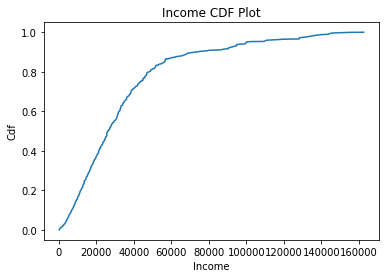

In [ ]:
cdf_income = Cdf.from_seq(gss['realinc'])

# Plot
cdf_income.plot()
plt.title('Income CDF Plot')
plt.xlabel('Income')
plt.ylabel('Cdf')
plt.show()

### Distribution of education

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?

In [ ]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [ ]:
edu_cdf = Cdf.from_seq(gss.educ)
edu_cdf(12)

array(0.53226117)

Answer is approx : 53%

### Extract education levels

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

* Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
* Complete the line that identifies respondents with 12 or fewer years of education.
* Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [ ]:
educ = gss['educ']
bach = educ > 16
assc = (educ >= 14) & (educ < 16)
high = educ <= 12
print(high.mean())

0.5308807991547402


### Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

In [ ]:
income = gss.realinc

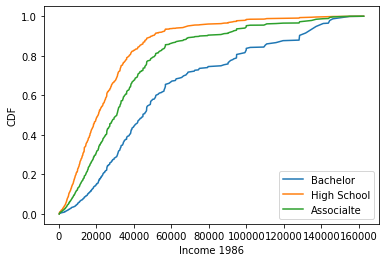

In [ ]:
Cdf.from_seq(income[bach]).plot(label = 'Bachelor')
Cdf.from_seq(income[high]).plot(label = 'High School')
Cdf.from_seq(income[assc]).plot(label = 'Associalte')
plt.xlabel("Income 1986")
plt.ylabel("CDF")
plt.legend()
plt.show()

Nice job. It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.

### Model Distribution

* PMF don't work very well when data have large number of unique values

* Lets discuss about PDF (probability density function) and learn how to estimate pdf from the data


Let's Start with __normal distribution__ also known as _Galcian Distribution__:

#### Normal Distribution

As we know most of the thing that we measure in the world are normally distributed.

To get the sense how the normal distribution look like we will use __numpy__ to generate random value which are normally distributed and will plot the __CDF__ for the same using Cdf from the modules.

In [ ]:
sample = np.random.normal(size = 1000)

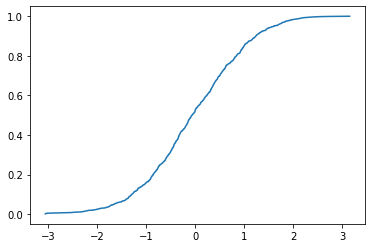

In [ ]:
Cdf.from_seq(sample).plot()


This is a sygmoid shape what we can except from the normal distribution

#### Normal CDF.

__Scify__ provide the package called norm. which we can use to understand the normal distribution

In [ ]:
from scipy.stats import norm, binom
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)

we will use linspace to create an array with equally space point from -3 and 3. __norm(0,1)__ represent the a normal distribution with mean 0 and standard deviation 1.

then __.cdf()__ evaluate the CDF of normal distribution

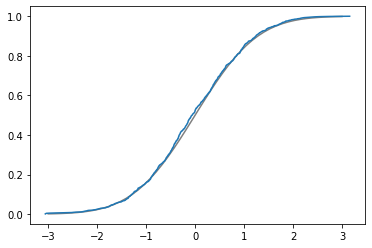

In [ ]:
plt.plot(xs,ys,color = 'gray')
Cdf.from_seq(sample).plot()
plt.show()

Here we are ploting the ploting the result with gray line and together with a sequencial number for nomal distribution of sample_size 1000.

We can see that Cdf for the sample is very close the cdf for the whole range. If that (xs, ys) was the real data then we made conclusion that the normal distribution a good model for the data

#### Bell Curve

The norm object also provide __dot pdf__ which means probability density function or PDF. Which will show us the bell shaped curve.

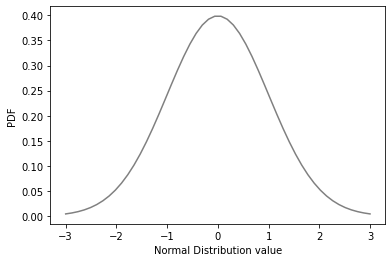

In [ ]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys,color = 'gray')
plt.ylabel('PDF')
plt.xlabel('Normal Distribution value')
plt.show()

Unfortunatelly if we compare this PDF with pmf then it will not work properly

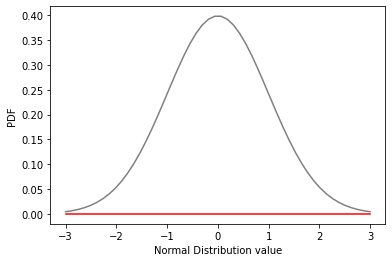

In [ ]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys,color = 'gray')
plt.plot(xs, binom(0,1).pmf(xs),color = 'red')
plt.ylabel('PDF')
plt.xlabel('Normal Distribution value')
plt.show()

__pmf of this sample is a flat line accros the bottom__

In random sample every value is unique so the probabilty of every element is 1/1000.

However, we can use the points in the sample to estimate the PDF of the distribution they came from.

#### Kde Plot

This process is called Kernal  density estimation, or KDE. It's way of getting from a PMF, a probability mass funtion, to a PDF, a probabilty density function. To generate the KDE plot we will use `seaborn` library for data visualization.

In [ ]:
import seaborn as sns

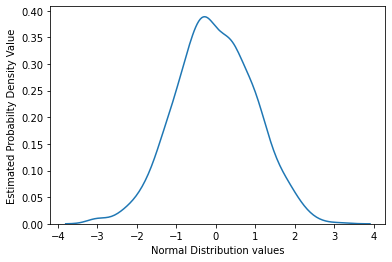

In [ ]:
sns.kdeplot(sample)
plt.xlabel('Normal Distribution values')
plt.ylabel('Estimated Probabilty Density Value')
plt.show()

#### KDE and PDF

Now we can compare the kde plot and normal pdf.

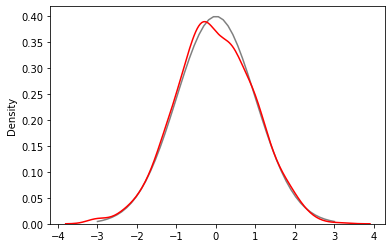

In [ ]:
xs = np.linspace(-3,3)
ys = norm.pdf(xs)
plt.plot(xs,ys,color = 'gray')
sns.kdeplot(sample, color='Red')
plt.show()

#### PMF , CDF and KDE (Final Thoughts)

* __Use CDF for exploration__
* __Use PMF if there are a small number of unique values__
* __Use KDE if there are a lot of values__

CDF is a best view of whats going on without getting distracted by noise. The biggest drawback of cdf is they are less well known. 

There we can use PMF we are presenting the result to the audiences.

### Distribution of income (normal_distribution using scipy)
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

* Extract 'realinc' from gss and compute its logarithm using np.log10().
* Compute the mean and standard deviation of the result.
* Make a norm object by passing the computed mean and standard deviation to norm().

In [ ]:
# extract the realincome form gss
income = gss.realinc

# computing logritham 
income_log = np.log10(income)

# compute the mean and standard deviation of the result
mean = income_log.mean()
std = income_log.std()
print(mean,std)

# importing scipy norm
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290082383271419


Now we can plot the model and the observed distribution and see where they differ.

### Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

    # Extract realinc and compute its log
    log_income = np.log10(gss['realinc'])

    # Compute mean and standard deviation
    mean, std = log_income.mean(), log_income.std()

    # Make a norm object
    from scipy.stats import norm
    dist = norm(mean, std)

dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

* Evaluate the normal cumulative distribution function using dist.cdf.
* Use the Cdf() function to compute the CDF of log_income.
* Plot the result.


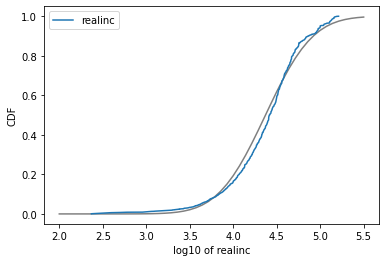

In [ ]:
xs = np.linspace(2,5.5)
dist_norm = dist.cdf(xs)

plt.plot(xs, dist_norm, color = 'grey')
Cdf.from_seq(income_log).plot()
plt.legend()
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.

### Comparing PDFs

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

    from scipy.stats import norm
    dist = norm(mean, std)

Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. To learn more about this function and Seaborn, you can check out DataCamp's Data Visualization with Seaborn course. Here, Seaborn has been imported for you as sns.

* Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
* Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.

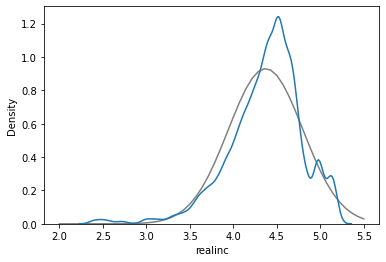

In [ ]:
plt.plot(xs, dist.pdf(xs), color = 'grey')
sns.kdeplot(income_log)

plt.show()

We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. In the next Chapter we'll explore relationships between variables, starting with heights and weights from a large survey of adults in the U.S. See you there!

## Relationships

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.



### Exploring Relations

Data We are using here is from behavioural risk factory surveillance system. We will try identify the relation ship between height and weight. BRFSS run by the center of disease control this survey included more then 400000 respondant, but to keep thing manageble we will use the random sample of 100000 respondent.


In [ ]:
brfss = pd.read_hdf('/content/drive/MyDrive/DataCamp_DataScience/Eploratory Data Analysis/brfss.hdf5')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


#### Scatter Plot.

We are using scatter plot to plot the relation ship between. Height and weight.

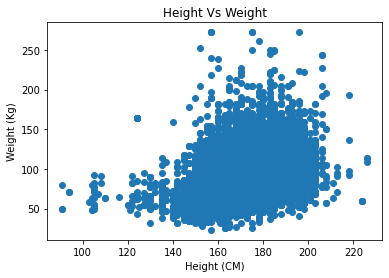

In [ ]:
height = brfss.HTM4
weight = brfss.WTKG3
plt.plot(height,weight,'o')
plt.xlabel('Height (CM)')
plt.ylabel('Weight (Kg)')
plt.title('Height Vs Weight')
plt.show()

**Problem with ScatterPlot**
1. They hard to interpriet.
2. It is 'overfitted', which means that there are data which are points pilled.

We can use the alpha property resolve this issue.

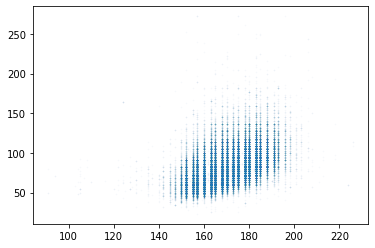

In [ ]:
plt.plot(height,weight, 'o', markersize = 1, alpha = 0.02)
plt.show()

Here fist we have used the alpha and reduced the markersize to make the point visible perfectlly.

#### Jitter

We can break up the column by adding random noise to the height in other word we filling up the values that got rounded off. This is called __jittering__ 

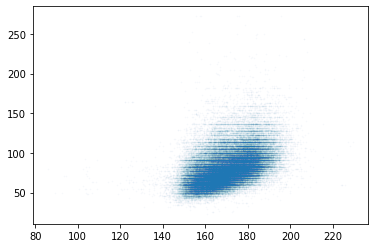

In [ ]:
height_jitter = height + np.random.normal(0,2,size = len(brfss))

plt.plot(height_jitter, weight, 'o', markersize = 1, alpha = 0.02)
plt.show()

Now doing the same with weight

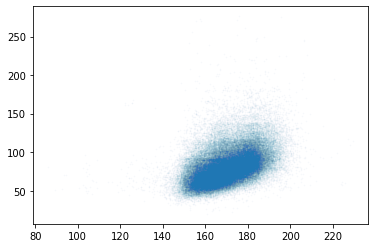

In [ ]:
weight_jitter = weight + np.random.normal(0,2,size = len(brfss))
plt.plot(height_jitter,weight_jitter, 'o',markersize = 1, alpha = 0.02)
plt.show()

Now zoom in the plot

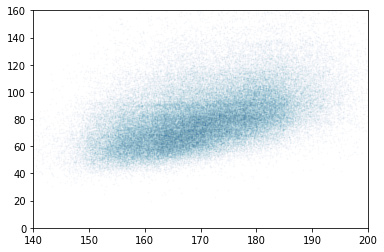

In [ ]:
plt.plot(height_jitter,weight_jitter, 'o', markersize = 1, alpha = 0.02)
plt.axis([140,200,0,160])
plt.show()

### PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.


* Extract the variable 'AGE' from the DataFrame brfss and assign it to age.
* Plot the PMF of age as a bar chart.

In [ ]:
age = brfss.AGE
age

96230     47.0
244920    89.5
57312     42.0
32573     32.0
355929    32.0
          ... 
376876    32.0
201499    89.5
192176    57.0
342705    27.0
379327    27.0
Name: AGE, Length: 100000, dtype: float64

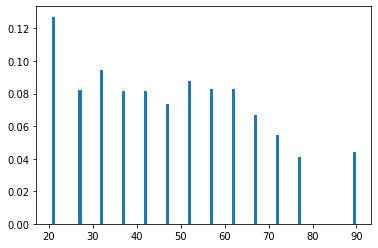

In [ ]:
Pmf.from_seq(age).bar()

we're off to a good start. Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions.

### Scatter plot
Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

Make a scatter plot of weight and age with format string 'o' and alpha=0.1.

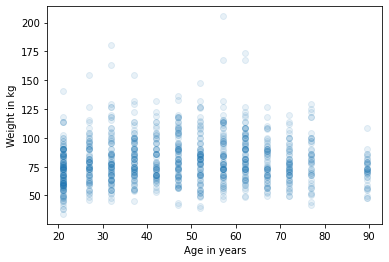

In [ ]:
brfss = brfss[:1000]

age = brfss.AGE
weight = brfss.WTKG3

plt.plot(age, weight, 'o', alpha = 0.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

So far so good. By adjusting alpha we can avoid saturating the plot. Next we'll jitter the data to break up the columns.

### Jittering
In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

    height_jitter = height + np.random.normal(0, 2, size=len(brfss))
    weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

* Add random noise to age with mean 0 and standard deviation 2.5.
* Make a scatter plot between weight and age with marker size 5 and alpha=0.2. Be sure to also specify 'o'.


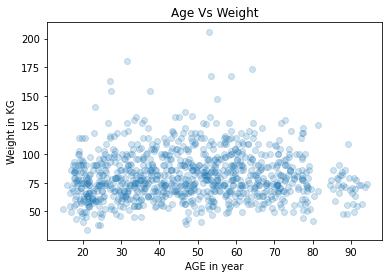

In [ ]:
age = age + np.random.normal(0,2.5, size = len(brfss))
plt.plot(age, weight,'o',alpha = 0.2)
plt.title('Age Vs Weight')
plt.xlabel('AGE in year')
plt.ylabel('Weight in KG')
plt.show()

By smoothing out the ages and avoiding saturation, we get the best view of the data. But in this case the nature of the relationship is still hard to see. In the next lesson, we'll see some other ways to visualize it.

### Visualizing relationships

Here we will learn box plot and violin plot.

I above cells we have used scatter plot to plot the relation between weight and age. Which look like this.

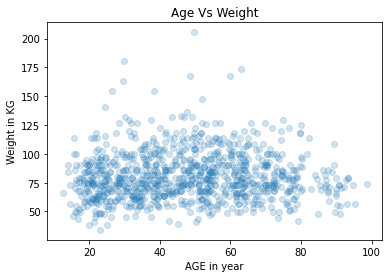

In [ ]:
age = age + np.random.normal(0,2.5, size = len(brfss))
plt.plot(age, weight,'o',alpha = 0.2)
plt.title('Age Vs Weight')
plt.xlabel('AGE in year')
plt.ylabel('Weight in KG')
plt.show()

It look like a direct relationship. Where older people tend have high weight. But it is not as clear as we supposed to have it.

In exercises we have worked with small set of data let check how it look like for more data.

In [ ]:
brfss = pd.read_hdf('/content/drive/MyDrive/DataCamp_DataScience/Eploratory Data Analysis/brfss.hdf5')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


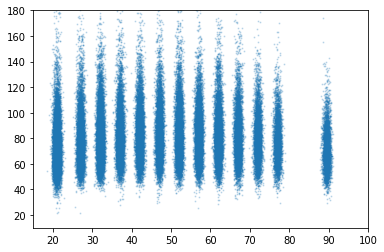

In [ ]:
age = brfss.AGE + np.random.normal(0,0.5, size = len(brfss))
weight = brfss.WTKG3 + np.random.normal(0,2,size = len(brfss))

plt.plot(age,weight,'o',markersize = 1,alpha = 0.2)

plt.axis([15,100,10,180])
plt.show()

we can see the shape of the distribution in each age group. If we move one step forward then we can use density to plot the distribution of each column. And there is a solution called violin plot

#### Violin Plot

Before ploting the violin plot we have to drop the rows where age and weight is null.

In [ ]:
data = brfss.dropna(subset=['AGE','WTKG3'])

In [ ]:
data.shape

(92729, 9)

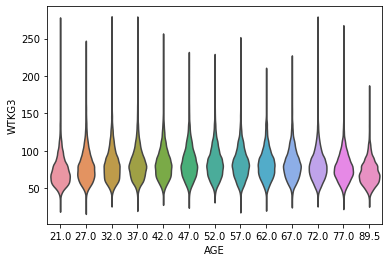

In [ ]:
sns.violinplot(x = 'AGE', y = 'WTKG3', data = data, inner = None);

Each column here is a graphical representation of the distribution of weight in different age groups. The width of this shape is propotionate to the estimated density, so it's like two vertical PDF plotted back to back and filled with different color.

There is also another way to look this type of data and that is box plot

#### Box Plot

The code to generate the plot is very similar to violin plot

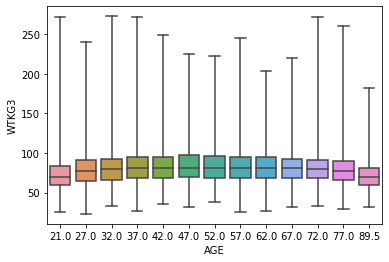

In [ ]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10);

Each box here represent the IQR __(Inter Quartile Range)__ from 25th to 75th percentile. 

The Spine in the middle is a median and line to the top and bottom is maximum and minimum values.

* Looking at the median it seems like people at the age of 40 is the heaviest, younger and older are lighter.

* And looking at the size of the boxes it looks like people at the age of 40's has the highest variablity.

This plot also showed how skewed the distribution of weights are. That is, heaviest people are much further from the mediun as compare to the lightest people

For the data that skewed toward higher values, it is sometime useful to look at it on a logiritham scale. This can be done by using pyplot function __plt.yscale('log')__

[]

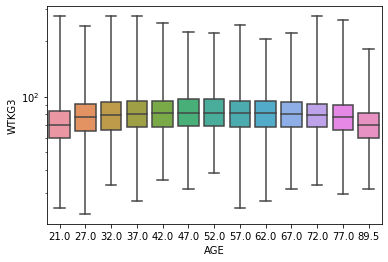

In [ ]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10);
plt.yscale('log')
plt.plot()

### Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

    sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
    plt.yscale('log')

* Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('_HTMG10') group. Specify whis=10, just as was done in the video.
* Add a line to plot the y-axis on a logarithmic scale.

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6.5)

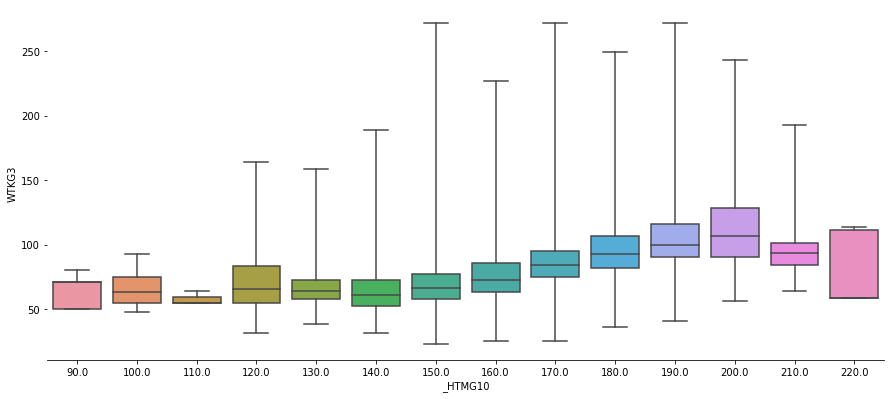

In [ ]:
sns.boxplot(y = data.WTKG3, x = data._HTMG10, whis = 10)
# Remove unneeded lines and label axes
sns.despine(left=True,right = True)
plt.show()


### Distribution of income
In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

* Extract 'INCOME2' from the brfss DataFrame and assign it to income.
* Plot the PMF of income as a bar chart.

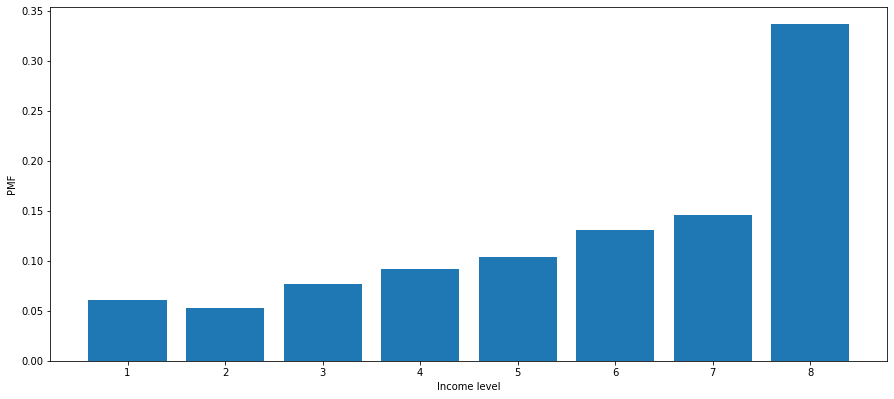

In [ ]:
income = brfss.INCOME2
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.

### Income and height
Let's now use a violin plot to visualize the relationship between income and height.

* Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.


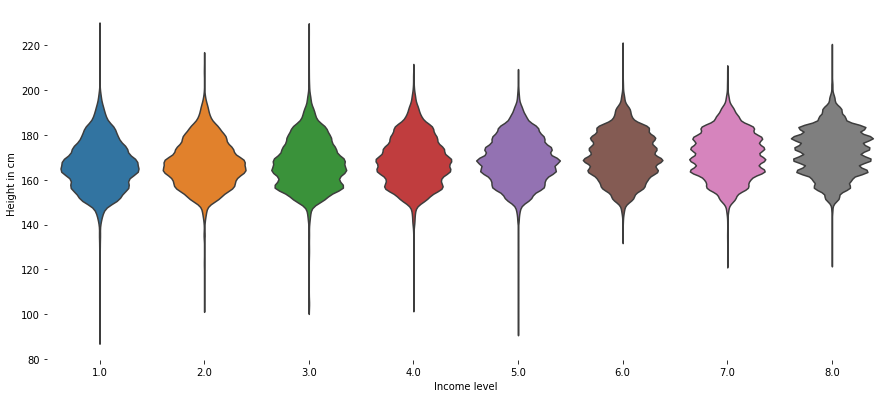

In [ ]:
sns.violinplot(x = data.INCOME2, y = data.HTM4, inner = None);
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

It looks like there is a weak positive relationsip between income and height, at least for incomes below the median. In the next lesson we'll see some ways to quantify the strength of this relationship.

### Correlation (Person Cofficient of Correlation)

It give us the number between -1 and 1 that quantifies the strength of a linear relationship between two variables.

Let's see the correlation matrix

In [ ]:
columns = ['HTM4','WTKG3','AGE']
data[columns].corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.473888,-0.093457
WTKG3,0.473888,1.000000,0.021641
AGE,-0.093457,0.021641,1.000000


This is a correlation matrix.

The intresting thing we are seeing there the relationship between Weight and age is very low. But we have checked the box plot where it is clearly visible that there is a clear relation ship between age and weight. Then why corelation is very low as per the matrix and that is because corelation only measure the linear relationship but in the above dataframe the relation is not linear it is non-linear relation ship. 

Let's see this with example:


In [ ]:
xs = np.linspace(-1,1)
ys = xs**2
ys += np.random.normal(0,0.05, len(xs))
np.corrcoef(xs,ys)

array([[ 1.        , -0.00269574],
       [-0.00269574,  1.        ]])

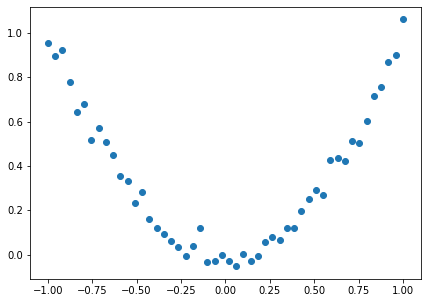

In [ ]:
plt.subplots(figsize = (7,5))
plt.plot(xs,ys,'o')

here as per the matrix we can see there is very low coffecient of correlation. But as we can see the scatter plot there is a strong relationship. The relationship here is non-linear.

__Problem in correlations__

* Correlations say nothing about slope.
* correlation simply defines something relatied with other and we use this pridict the futrue outcome. But that might not always the case.

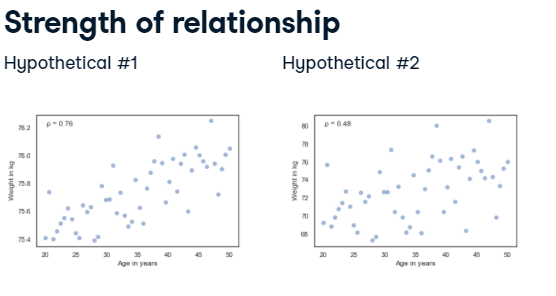

This is a fake data:

In the `Hypothetical #1` weight gain is only 1 kg in 30 year where as in right `Hypothetical #2` the weight gain is almost 10 kg. But still the correlation is high in right. Becuase it didn't take slope into consideration


### Computing correlations

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

* From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.
* Compute the correlation matrix for these variables.


In [ ]:
columns = ['AGE','INCOME2','_VEGESU1']
brfss[columns].corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


* People with higher incomes eat more vegetables.
* There could be a strong nonlinear relationship between age and vegetable consumption.

The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does not mean there is no relationship.

### Simple Regression

To understand the slope we have to use the linear regression. This is also known as simple linear regression. We can use linregress from statmodel


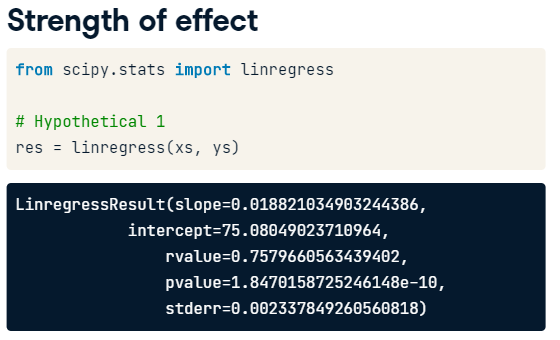

for the hypothetical example number the slope is 0.081 kg per year

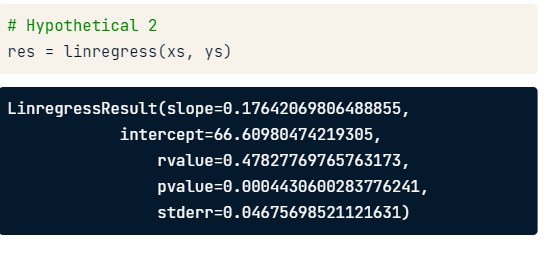

And for Hypothetical number 2 slope is almost ten time the hypothetical number 1. Here the rvalue which means coffiecient of corelation is high in 1st example but slope is 10 time less.

In [ ]:
from scipy.stats import linregress


In [ ]:
subset = brfss.dropna(subset = ['WTKG3','HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs,ys)

In [ ]:
res

LinregressResult(slope=0.9192115381848305, intercept=-75.12704250330248, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802998)

So here slope is 0.91 which means every 'CM' raise in height tend to raise same 'CM' in weight

#### Height Vs Weight

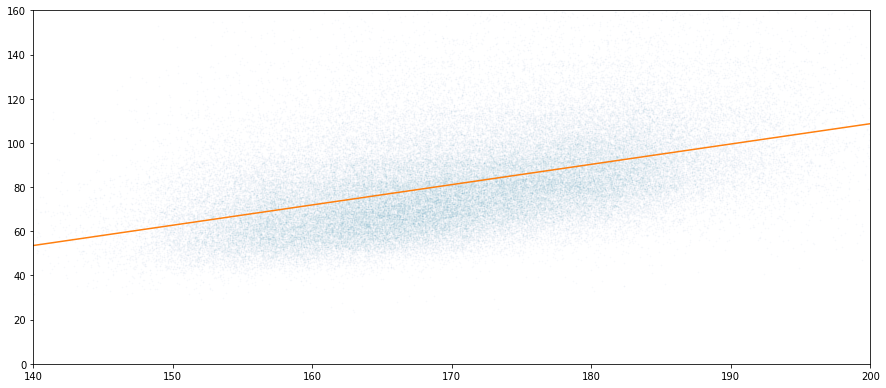

In [ ]:
plt.plot(xs + np.random.normal(0,2,len(xs)),ys + np.random.normal(0,2,len(ys)),'o',markersize = 1, alpha = 0.02)
plt.axis([140,200,0,160])
fx  = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,'-')
plt.show()

#### Weight and AGE

Calculate linear regression

In [ ]:
subset.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [ ]:
subset = brfss.dropna(subset = ['WTKG3','AGE'])
xs = subset.AGE
ys = subset['WTKG3']
reg = linregress(xs,ys)
reg

LinregressResult(slope=0.023981159566968734, intercept=80.07977583683224, rvalue=0.02164143288906408, pvalue=4.374327493007456e-11, stderr=0.003638139410742185)

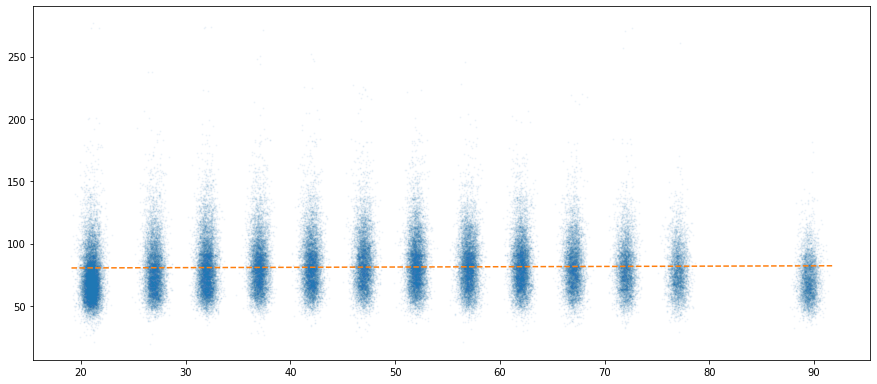

In [ ]:
plt.plot(xs+np.random.normal(0,0.5,len(xs)) , ys + np.random.normal(0,2,len(ys)), 'o', markersize = 1, alpha = 0.05)
fx = np.array([min(xs+np.random.normal(0,0.5,len(xs))) , max(xs+np.random.normal(0,0.5,len(xs)))])
fy = reg.intercept + reg.slope * fx
plt.plot(fx,fy,'--')
plt.show()

### Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

* Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.
* Compute the simple linear regression of these variables.


In [ ]:
subset = brfss.dropna(subset=['INCOME2','_VEGESU1'])

In [ ]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)


the estimated slope tells you the increase in vegetable servings from one income group to the next.

### Fit a line
Continuing from the previous exercise:

* Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

* res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

* Set fx to the minimum and maximum of xs, stored in a NumPy array.
* Set fy to the points on the fitted line that correspond to the fx.

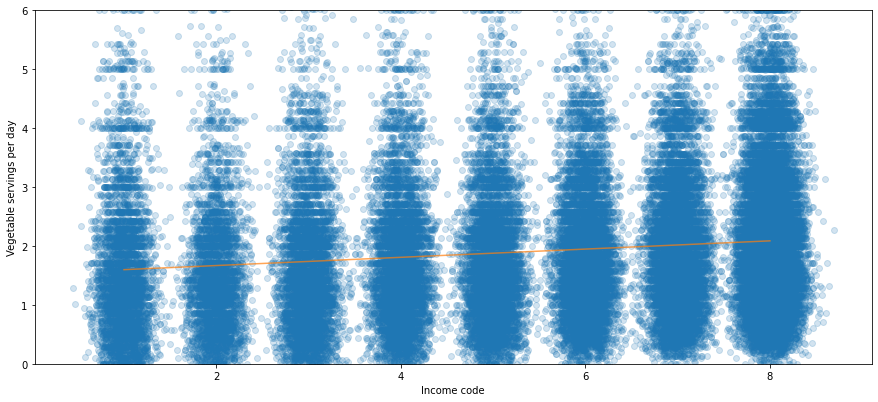

In [ ]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

We've seen several ways to visualize relationships between variables and quantify their strength. In the next chapter we use regression to explore relationships among more than two variables.

## Multivariate Thinking

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

### Limits of Simple regression

1. Regression is not symentic because regression of A on B is not same as regression of B on A

2. Regression doesn't tell us about causation

#### Multiple Regression (Using statemodel)


In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = smf.ols('INCOME2 ~ _VEGESU1', data = brfss).fit()

In [ ]:
result.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

### Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.


* Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().
* Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().




In [ ]:
subset = brfss.dropna(subset= ['_VEGESU1','INCOME2'])
ys = subset['_VEGESU1']
xs = subset['INCOME2']

In [ ]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('INCOME2 ~ _VEGESU1', data = subset).fit()
print(results.params)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
Intercept    5.450700
_VEGESU1     0.204935
dtype: float64


### Multiple Regression:

we will use gss data. 

In [ ]:
gss

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.889300
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.444600
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.333900
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.889300
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.889300
...,...,...,...,...,...,...,...,...,...,...
62461,2016,32.0,1984.0,1,1,13.0,74880.0,1.0,NaN,0.956994
62462,2016,61.0,1955.0,2,1,16.0,65520.0,NaN,1.0,0.956994
62463,2016,67.0,1949.0,2,1,13.0,NaN,NaN,2.0,1.564363
62464,2016,57.0,1959.0,2,1,12.0,9945.0,2.0,NaN,0.956994


In [ ]:
result = smf.ols('realinc ~ educ', data = gss).fit()
result.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

#### Calculation multiple linear regression

In [ ]:
result = smf.ols('realinc ~ educ + age', data = gss).fit()
result.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

#### Adding a quadratic term


On the right side we can add as many vaiable we want using '+' sign

In [ ]:
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

#### Income and age

In [ ]:
grouped = gss.groupby('age')

In [ ]:
mean_income_by_age = grouped['realinc'].mean()

In [ ]:
mean_income_by_age

age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
            ...     
85.0    20792.064012
86.0    22539.024754
87.0    18200.485317
88.0    20555.524660
89.0    14068.617666
Name: realinc, Length: 72, dtype: float64

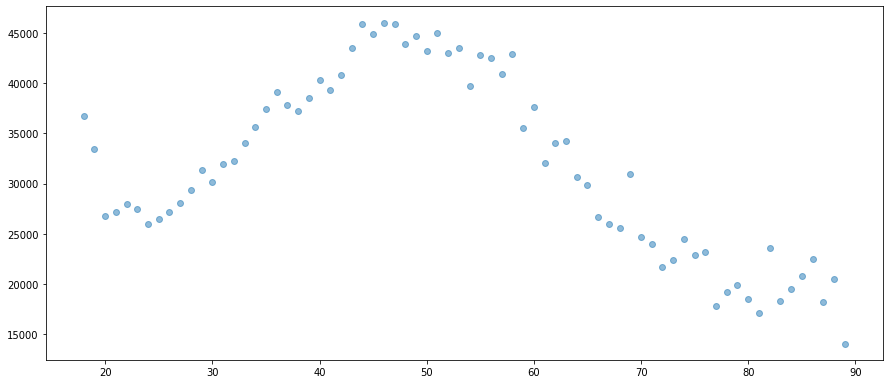

In [ ]:
plt.plot(mean_income_by_age, 'o', alpha = 0.5)

Average increases from 20 to 50, then start falling. And thats explains why the estimated slope is very very because the relationship is non-linear.

Remember that correlation and linear regression can't measure non-linear relationship. 

To describe the non-linear relationship.
Add a new variable that is non-linear combination of other variable called age2 which is a square of age.

### Plot income and education
To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

* Group gss by 'educ'. Store the result in grouped.
* From grouped, extract 'realinc' and compute the mean.
* Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.


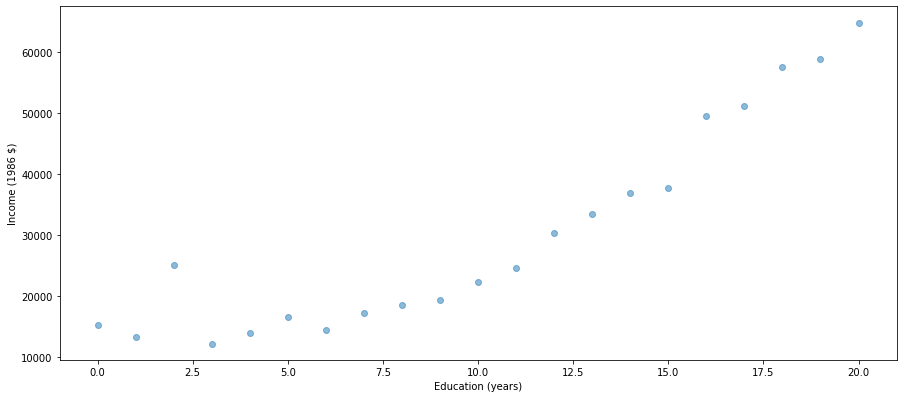

In [ ]:
grouped = gss.groupby('educ')
mean_income_by_edu = grouped['realinc'].mean()
plt.plot(mean_income_by_edu, 'o', alpha = 0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()


it looks like the relationship between income and education is non-linear.

#### Non-linear model of education
The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

* Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.
* Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'.

In [ ]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data = gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


The slope associated with educ2 is positive, so the model curves upward.

### Visualizing regression results

In the previous lesson we ran a multiple regression model to characterize the relationship between income and age. Because the model is non-linear, the parameters are hard to interpret. In this lesson we'll see a way to interpret them visually, and to validate them against data.




#### Modeling income and age:

Here's the model from the previous exercise. First, we created new variables for educ squared and age squared. Then we ran the regression model with educ, educ2, age, and age2. And here are the results. The parameters are hard to interpret. Fortunately, we don't have to -- sometimes the best way to understand a model is by looking at its predictions rather than its parameters.

In [ ]:
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2

In [ ]:
model = smf.ols('realinc ~ educ + educ2 + age + age2', data = gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


#### Generating predictions:

The regression results object provides a method called predict() that uses the model to generate predictions. It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. To use it, I'll create a new DataFrame with age running from 18 to 85, and age2 set to age squared. Next, I'll pick a level for educ, like 12 years, which is the most common value. When you assign a single value to a column in a DataFrame, Pandas makes a copy for each respondent. Then we can use results to predict the average income for each age group, holding education constant.



In [ ]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2 #age running from 18 to 85, and age2 set to age squared
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)


#### Plotting predictions

The result from predict() is a Series with one prediction for each row. So we can plot it like this, with age on the x-axis and the predicted income for each age group on the y-axis. We can plot the data for comparison, like this; recall that we computed mean_income_by_age in the previous lesson. And we should label the axes, as always.



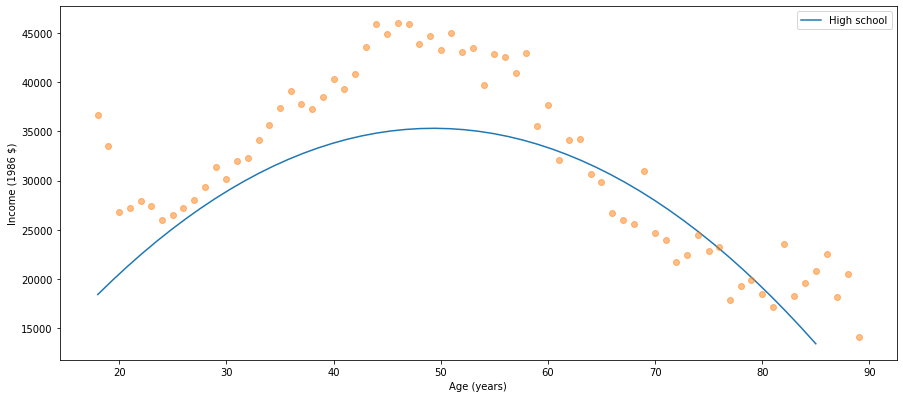

In [ ]:
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()


#### Comparing with data

Here are the results. The blue dots show the average income in each age group. The orange line shows the predictions generated by the model, holding education constant. This plot shows the shape of the model, a downward-facing parabola.




#### Levels of education

We can do the same thing with other levels of education, like 14 years, which is the nominal time to earn an Associate's degree, and 16 years, which is the nominal time to earn a Bachelor's degree.



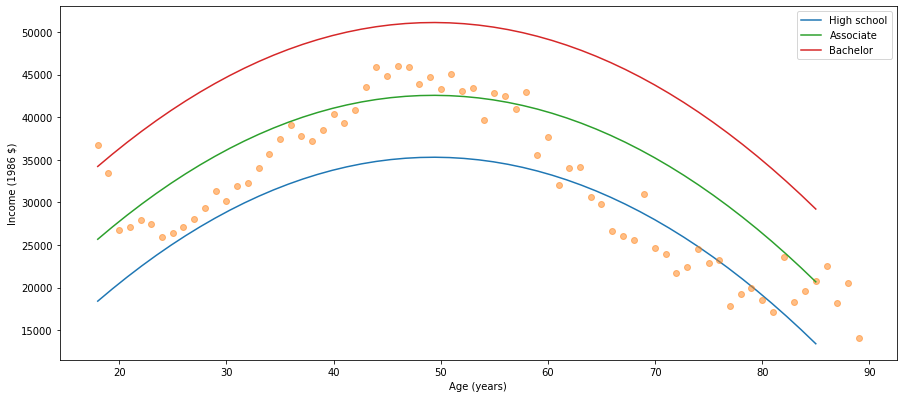

In [ ]:
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()


#### Interpreting the results

And here are the results. The lines show mean income, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.



#### Let's practice!

In the exercises, you'll have a chance to run a multiple regression, generate predictions, and visualize the results. Have fun!

### Making predictions
At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

* Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
* Add a variable named 'age' with the constant value 30.
* Use df to generate predicted income as a function of education.

In [ ]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


### Visualizing predictions
Now let's visualize the results from the previous exercise!

* Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
* Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.

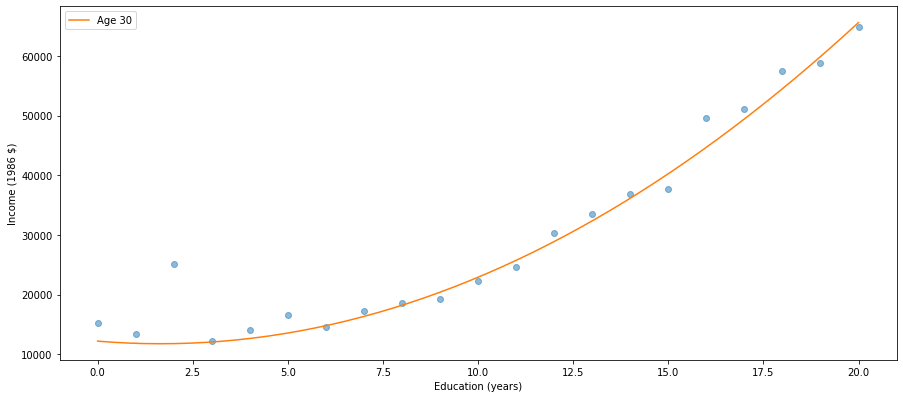

In [ ]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.


* Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
* Add a variable named 'age' with the constant value 30.
* Use df to generate predicted income as a function of education.

In [ ]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2,educ2
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,676.0,324.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0,144.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0,144.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0,196.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,3481.0,144.0


In [ ]:
results = smf.ols('realinc ~ age + age2 + educ + educ2', data = gss).fit()

In [ ]:
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df.educ ** 2
df['age2'] = df.age ** 2

In [ ]:
# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


###Visualizing predictions
Now let's visualize the results from the previous exercise!

* Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
* Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.


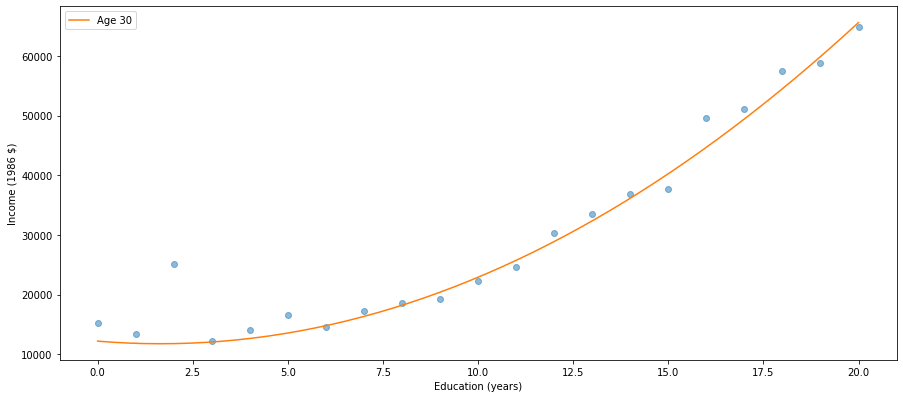

In [ ]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### Logistic regression

Congratulations on making it this far! I have saved one of my favorite topics for the end - logistic regression.


####Categorical variables
To understand logistic regression, we have to start with categorical variables. Most of the variables we have used so far - like income, age, and education - are numerical. But variables like sex and race are categorical; that is, each respondent belongs to one of a specified set of categories.

####Sex and income
With StatsModels, it is easy to include a categorical variable as part of a regression model. Here's how. In the formula string, the letter C indicates that sex is a categorical variable. And here are the results. The regression treats the value sex=1, which is male, as the default, and reports the difference associated with the value sex=2, which is female. So this result indicates that income for women is about $4100 less than for men, after controlling for age and education.

In [ ]:
formula = 'realinc ~ educ2 + educ + age + age2 + C(sex)'
results = smf.ols(formula,data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ2            150.514091
educ            -310.247419
age             1703.047502
age2             -17.238711
dtype: float64

####Boolean variable
If a categorical variable has only two values, it's called a boolean variable. For example, one of the questions in the General Social Survey asks "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" The variable is called gunlaw, and here are the values. 1 means yes and 2 means no, so most respondents are in favor. To explore the relationship between this variable and factors like age, sex, and education, we can use logistic regression. StatsModels provides logistic regression, but to use it, we have to recode the variable so 1 means yes and 0 means no. We can do that by replacing 2 with 0. And we can check the results.

In [ ]:
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [ ]:
gss['gunlaw'].replace([2],[0],inplace = True)

In [ ]:
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

#### Logistic regression
Now we can run the regression. Instead of ols(), we use logit(), which is named for the logit function, which is related to logistic regression. Other than that, everything is the same as what we have seen before. And here are the results. The parameters are in the form of "log odds", which you may or may not be familiar with. I won't explain them in detail here, except to say that positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control. To see how much more likely, we can generate and plot predictions, as we did with linear regression.

In [ ]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data = gss).fit()

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


In [ ]:
results.params

Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

#### Generating predictions
As an example, I'll generate predictions for different ages and sexes, with education held constant. First we need a DataFrame with age and educ. Then we can compute age2 and educ2. We can generate predictions for men like this. And for women like this.

In [ ]:
df = pd.DataFrame()
df['age'] = np.linspace(18,89)
df['educ'] = 12

df['age2'] = df['age'] ** 2
df['educ2'] = df['educ'] ** 2

df['sex'] = 1
pred = results.predict(df)

In [ ]:
df['sex'] = 2
pred2 = results.predict(df)

#### Visualizing results
Now, to visualize the results, I start by plotting the data. As we've done before, we'll divide the respondents into age groups and compute the mean in each group. The mean of a binary variable is the fraction of people in favor. Now we can plot the predictions, for men and women, as a function of age. And label the axes.

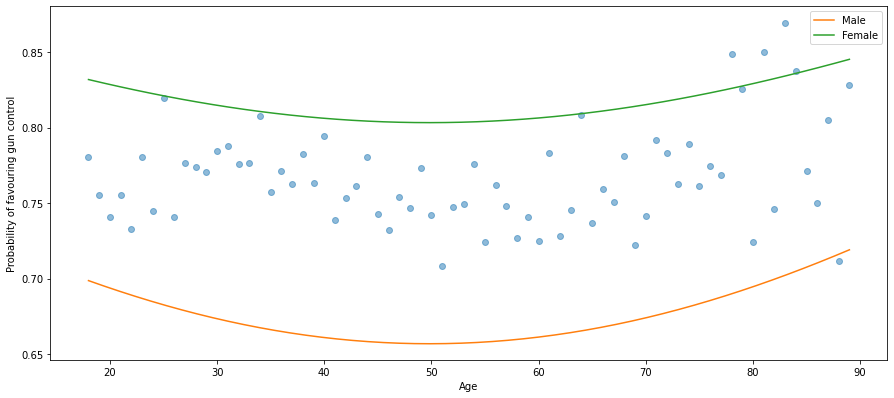

In [ ]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o',alpha = 0.5)

plt.plot(df['age'] , pred, label = 'Male')
plt.plot(df['age'] , pred2, label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favouring gun control')
plt.legend()

#### Gun laws and age
Here's what it looks like. According to the model, people near age 50 are least likely to support gun control (at least as this question was posed). And women are more likely to support it than men, by almost 15 percentage points.

#### Let's practice!
Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict it. In the exercises, you'll explore the factors that predict support for legalizing marijuana.

### Predicting a binary variable
Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

* Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable.


In [ ]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age+age2+educ+educ2 + C(sex)', data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

* Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.


In [ ]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ'] ** 2

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


* Generate separate predictions for men and women.


In [ ]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


* Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with the label 'Female'.


Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


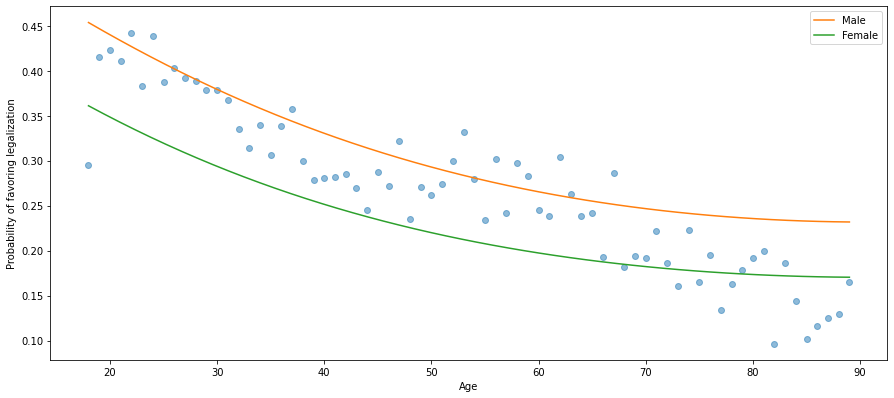

In [ ]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()